In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['savefig.dpi'] = 600

In [3]:
# set seed
np.random.seed(seed=2)

In [4]:
class Demand:
    
    def __init__(self,Pobs,Qobs,eta):
        self.Pobs = Pobs
        self.Qobs = Qobs
        self.eta = eta
        self.C = np.log(self.Pobs)-(np.log(self.Qobs)/self.eta)
    
    def scale(self,pop,PRfut):
        return pop + (ln(1/PRfut)/self.eta)
    
    def price(self,Q):
        return np.exp((np.log(Q)/self.eta)+self.C)


In [18]:
eta_min, eta_max = -0.1, -0.3
eta_u = stats.uniform(loc=eta_max,scale=eta_min-eta_max)
eta_sample = stats.uniform.rvs(loc=eta_max,scale=eta_min-eta_max,size=1000)

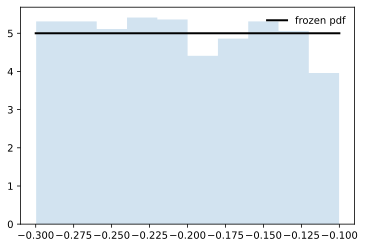

In [19]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(eta_max,eta_min, 100)
ax.plot(x, eta_u.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(eta_sample, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

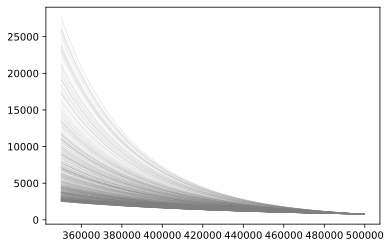

In [20]:
q = np.linspace(3.5e5,5e5,1000)
for i in range(1,1000):
    eta = eta_sample[i]
    d = Demand(741,503e3,eta)
    p = d.price(Q=q)
    plt.plot(q,p,color='grey',alpha=0.1,lw=0.5)